# Projeto 1 - Base de Dados Covid

### Turma 767 
### Leonardo do Ó

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocês), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

## Critérios de Avaliação

Um processo de análise e modelagem de dados depende de diversos fatores, desde quais sementes aleatórias foram definadas até mesmo o desempenho computacional da máquina utlizada. Dessa forma, __não__ será cobrado que resultados os alunos obteram, mas sim o desenvolvimento do projeto, olhando os seguinte tópicos:

- Desenvolvimento mínimo de cada um dos itens acima;

- Padrozinação de Gráficos, Visualizações e códigos;

- _Clean Code_ e códigos comentados;

- Explicação de todos os processos feitos e decisões tomadas


<br>


## Informações Gerais sobre o Projeto

- O projeto poderá ser desenvolvido __individualmente__;

- Data de Divulgação do Projeto: 09/02/2022;

- Monitoria do Projeto 1: 18/02/2022;

- Data de Entrega: 23/02/2022;

- Entrega: Através do _Class_, será criado um Projeto para a entrega dentro do módulo "_Machine Learning_", Aula "Árvore de Decisão" na aba Exercícios;

<br>

__Padrão de Entrega__ Para a identificação dos alunos que entregaram o projeto, peço para que sigam o padrão de nome para o arquivo enviado conforme as orientações abaixo:

- NúmeroDaTurma_Projeto1_NomeDoALuno.ipynb;

__Bem Importante:__ Deixem devidamente identificado o número da turma e o nome do aluno dentro do Notebook também.

In [1]:
# IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# 1º Etapa

### - __Preparação dos Dados e Verificação de Consistência__:

In [2]:
# Verificando o se o data frame tem dados duplicados
df = pd.read_csv('COVID.csv')
df[df.duplicated(keep=False)] # Nosso dataframe não tem dados duplicados

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu


In [3]:
# Renomeando as colunas para facilitar o entendimento das features

df.columns = ['id', 'sexo', 'tipo_tratamento', 'entubado', 'pneumonia', 'idade',
             'gravidez', 'diabetes', 'copd', 'asma', 'imunosupressao', 'hipertensao', 'outra_doenca',
             'doenca cardiaca', 'obesidade', 'problema_renal', 'fumante', 'contato_virus', 'result_covid', 'UTI']
df

,id,sexo,tipo_tratamento,entubado,pneumonia,idade,gravidez,diabetes,copd,asma,imunosupressao,hipertensao,outra_doenca,doenca cardiaca,obesidade,problema_renal,fumante,contato_virus,result_covid,UTI
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [4]:
# verificando dados faltantes
df.isna().sum()/len(df)*100

id                  0.000000
sexo                0.000000
tipo_tratamento     0.000000
entubado           78.501957
pneumonia           0.002201
idade               0.000000
gravidez           50.918166
diabetes            0.328402
copd                0.289378
asma                0.288578
imunosupressao      0.332605
hipertensao         0.297984
outra_doenca        0.438870
doenca cardiaca     0.301986
obesidade           0.294181
problema_renal      0.295382
fumante             0.315995
contato_virus      30.753944
result_covid        0.000000
UTI                78.502157
dtype: float64

In [5]:
# Contando os valores de UTI
df['UTI'].value_counts()

0.0    98414
1.0     9009
Name: UTI, dtype: int64

In [6]:
# Contando os valores de intubado
df['entubado'].value_counts()

0.0    98321
1.0     9103
Name: entubado, dtype: int64

#### Observações

- Observei que nas colunas intubado e UTI temos um número de dados nulos muito alto. 
- Verifiquei que as duas colunas tem tanto o valor 0.0 quanto o valor 1.0.

Não sei se acrescentar 0 ao valor nulo é o ideal, pois dado que a coluna tem os dois valores preenchidos pode-se entender que ouve erros nas classificações e preenchimentos dos dados ou que quando não intubado ou UTI, não era preenchido.

Acredito que eu deva partir do ponto ao qual eu não sei o por que de tantos dados faltantes. Será que foi um erro? ou será que estes valores são 0.0? Infelizmente não é possível se saber. 

Dado que o objetivo é prever os casos confimados, qualquer erro na EDA pode influênciar negativamente nas predições, logo decidi que na dúvida o melhor a se fazer é não trabalhar com tais colunas.

In [7]:
df.drop(columns=['UTI', 'entubado', 'id'], inplace=True) # Eliminei o id pois já verifiquei os dados duplicados
df

,sexo,tipo_tratamento,pneumonia,idade,gravidez,diabetes,copd,asma,imunosupressao,hipertensao,outra_doenca,doenca cardiaca,obesidade,problema_renal,fumante,contato_virus,result_covid
0,0,1,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
2,1,0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1
3,0,0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1
4,1,0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
499688,0,0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
499689,1,1,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
499690,1,1,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [8]:
# Preenchi com 0 os dados faltantes dos homens para grávidez 
df.groupby(['sexo'])['gravidez'].value_counts(dropna=False, normalize=True)*100

sexo  gravidez
0     NaN         100.000000
1     0.0          97.992652
      1.0           1.465567
      NaN           0.541781
Name: gravidez, dtype: float64

In [9]:
df.loc[df['sexo'] == 0, 'gravidez'] = 0

# Verificando mais uma vez os dados faltantes
df.isna().sum()/len(df)*100

sexo                0.000000
tipo_tratamento     0.000000
pneumonia           0.002201
idade               0.000000
gravidez            0.267365
diabetes            0.328402
copd                0.289378
asma                0.288578
imunosupressao      0.332605
hipertensao         0.297984
outra_doenca        0.438870
doenca cardiaca     0.301986
obesidade           0.294181
problema_renal      0.295382
fumante             0.315995
contato_virus      30.753944
result_covid        0.000000
dtype: float64

#### Conclusão

Visto que no caso da coluna contato_virus tem tanto 0.0 quanto 1.0 preenchidos, fica impossível deduzir o que é o que então eu decidi eliminar todos os dados faltantes dado que ainda teremos mais do que o suficiente para trabalhar.

In [10]:
df['contato_virus'].value_counts(dropna=False, normalize=True)*100

1.0    39.417481
NaN    30.753944
0.0    29.828574
Name: contato_virus, dtype: float64

In [11]:
df = df.dropna(how='any') # eliminando todas as linhas que tem dados faltantes
df.isna().sum()

sexo               0
tipo_tratamento    0
pneumonia          0
idade              0
gravidez           0
diabetes           0
copd               0
asma               0
imunosupressao     0
hipertensao        0
outra_doenca       0
doenca cardiaca    0
obesidade          0
problema_renal     0
fumante            0
contato_virus      0
result_covid       0
dtype: int64

In [12]:
df.reset_index(drop=True, inplace=True)
df

,sexo,tipo_tratamento,pneumonia,idade,gravidez,diabetes,copd,asma,imunosupressao,hipertensao,outra_doenca,doenca cardiaca,obesidade,problema_renal,fumante,contato_virus,result_covid
0,0,1,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,1,0.0,56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,1,1,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,1,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,1,1,0.0,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342690,1,1,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
342691,0,1,1.0,77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
342692,0,0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
342693,1,1,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
df.info() # A coluna contato vírus é um objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sexo             342695 non-null  int64  
 1   tipo_tratamento  342695 non-null  int64  
 2   pneumonia        342695 non-null  float64
 3   idade            342695 non-null  int64  
 4   gravidez         342695 non-null  float64
 5   diabetes         342695 non-null  float64
 6   copd             342695 non-null  float64
 7   asma             342695 non-null  float64
 8   imunosupressao   342695 non-null  float64
 9   hipertensao      342695 non-null  float64
 10  outra_doenca     342695 non-null  float64
 11  doenca cardiaca  342695 non-null  float64
 12  obesidade        342695 non-null  float64
 13  problema_renal   342695 non-null  float64
 14  fumante          342695 non-null  float64
 15  contato_virus    342695 non-null  float64
 16  result_covid     342695 non-null  int6

In [14]:
# Corrigindo a coluna contato vírus de objeto para float
df['contato_virus'] = df['contato_virus'].astype(float, errors = 'raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342695 entries, 0 to 342694
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sexo             342695 non-null  int64  
 1   tipo_tratamento  342695 non-null  int64  
 2   pneumonia        342695 non-null  float64
 3   idade            342695 non-null  int64  
 4   gravidez         342695 non-null  float64
 5   diabetes         342695 non-null  float64
 6   copd             342695 non-null  float64
 7   asma             342695 non-null  float64
 8   imunosupressao   342695 non-null  float64
 9   hipertensao      342695 non-null  float64
 10  outra_doenca     342695 non-null  float64
 11  doenca cardiaca  342695 non-null  float64
 12  obesidade        342695 non-null  float64
 13  problema_renal   342695 non-null  float64
 14  fumante          342695 non-null  float64
 15  contato_virus    342695 non-null  float64
 16  result_covid     342695 non-null  int6

# 2º Etapa

### Análise exploratória de dados

- Decidi fazer um mapa de calor para observar as correlações entre as features e o target, para saber o que está mais correlacionado com o target;

<AxesSubplot:title={'center':'Mapa de calor / Medindo correlação'}>

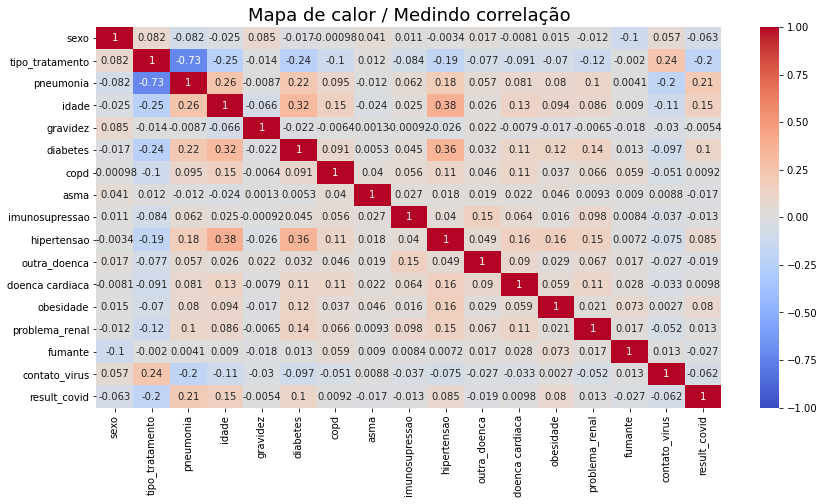

In [15]:
# Mapa de calor

plt.figure(figsize=(14,7))
plt.title("Mapa de calor / Medindo correlação", size=18)
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

### Observações

- No gráfico de correlação acima podemos perceber que quanto maior a idade, maior a chance de o paciente ter hipertensão, diabetes, até mesmo pneumonia, mas nada muito correlacionado com o nosso target;

O que podemos perceber é que quando o paciente está com pneoumonia aumenta a chance dele estar com covid e também quanto maior a idade, mas nada muito claro.

**Decisão**

Visto que não existe nenhuma correlação muito forte entre as features e o target acredito que a melhor forma é não tentar filtrar tanto as features e deixar o modelo aprender por si.

**Detalhe:**

    #Analisando as correlações
    sns.pairplot(data=df)
    plt.show()

Decidi não implementar o pairplot, pois acredito que não tem muita lógica devido ao data frame ser composto por 0 ou 1, a amostragem dos dados não fica muito legal, além de ocupar muito espaço na memória devido ao dataframe ser composto por um nº muito grande de dados

# 3º Etapa

### Modelagem dos Dados

In [16]:
X = df.drop(['result_covid'], axis = 1)
y = df['result_covid']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 12,
                                                    stratify = y)

# Função para gerar diversos testes de modelo
def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("ROC - AUC  : %0.4f " % auc)
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    
random_seed = 12

list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed)},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(random_state = random_seed, eval_metric='logloss')}#Corrigi o warning
]

Model      : Logistic Regression
Accuracy   : 0.6458 
Precision  : 0.6472 
Recall     : 0.6458 
F1 - Score : 0.5995 
ROC - AUC  : 0.5829 
Model      : AdaBoost
Accuracy   : 0.6483 
Precision  : 0.6525 
Recall     : 0.6483 
F1 - Score : 0.6010 
ROC - AUC  : 0.5847 
Model      : Random Forest
Accuracy   : 0.6383 
Precision  : 0.6305 
Recall     : 0.6383 
F1 - Score : 0.6005 
ROC - AUC  : 0.5809 
Model      : XGBoost
Accuracy   : 0.6506 
Precision  : 0.6544 
Recall     : 0.6506 
F1 - Score : 0.6058 
ROC - AUC  : 0.5884 


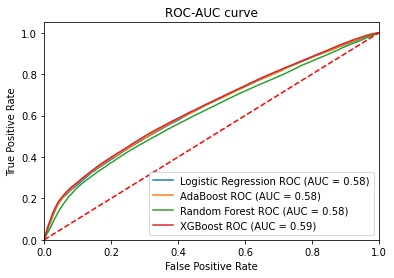

In [17]:
test_models_plot_roc_auc_curve(list_models,
                               "model_name",
                               "estimator",
                               X_train,
                               X_test,
                               y_train,
                               y_test)

## Curva ROC-AUC

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**, ela é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação.**

- O modelo que nos aprensentou uma **area maior na curva ROC** após o tracejado de 0.5 foi o modelo **XGBoost**, que por sinal também foi o que mostrou a **maior precisão** que nesse caso é o que vamos usar para tentar melhorar o modelo.

In [18]:
# Trazendo o modelo XGBoost para fora da função
best_model = XGBClassifier(random_state = random_seed, eval_metric='logloss') # eval_metric='logloss' corrigi o warning
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76     61405
           1       0.66      0.27      0.38     41404

    accuracy                           0.65    102809
   macro avg       0.66      0.59      0.57    102809
weighted avg       0.65      0.65      0.61    102809



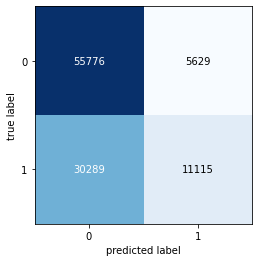

In [20]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

# Pontos a serem observados antes de continuarmos

#### Classificação

- O modelo classificou bem os dados, mas visto que estamos com **mais de 30 mil pacientes infectados que não estão sendo classificados como tal**, acredito que seja melhor diminuir o **y_proba** para que aumente o nº de classificações 1. Desse jeito é obvio que iremos perder em acurácia e precisão, mas conseguiremos **classificar mais pacientes infectados para que eles tenham acesso ao tratamento.**  

#### Validação cruzada

- Validação Cruzada é uma técnica utilizada para medir o __poder de generalização__ do nosso modelo. São feitos testes na prática para saber o quão preciso é um modelo, ou seja o seu desempenho em um novo conjunto de dados.

# Otimização do modelo

Na parte de otimização do modelo foi feito o ajuste do Threshold aonde eu diminui a precisão para que o modelo possa aumentar o nº de classificados 1 que no caso são os verdadeiros positivos.

Infelizmente o meu **Random Search** não carregou a tempo, acredito eu que por falta de memória na minha máquina dado que o .pairplot também não rodou na parte da analise gráfica.

In [21]:
# cross_val_score = Validação dos dados de treino para garantir a consistência dos dados
# cv = Nº de partes que divide os dados
# scoring = Métrica a ser acompanhada
print(cross_val_score(best_model, X_train, y_train, scoring='accuracy', cv=5))

[0.65315353 0.65158305 0.65149968 0.65122871 0.65402172]


In [22]:
# Criando o predict proba para a base de teste

y_proba_test = best_model.predict_proba(X_test)
y_proba_test

array([[0.5104453 , 0.4895547 ],
       [0.5629674 , 0.43703258],
       [0.5803143 , 0.41968575],
       ...,
       [0.5756005 , 0.42439952],
       [0.64793515, 0.35206482],
       [0.58006513, 0.41993484]], dtype=float32)

In [23]:
# trazer a resposta para junto das probabilidades
results_test = pd.DataFrame(y_test)

# Pegando a probabilidade em estar com COVID (classe 1)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [24]:
# Criando um dataframe com a probabilidade da classe 1 e a marcação de target
results_test.rename(columns={"Target": "target"}, inplace = True)
results_test.head()

,result_covid,proba
302324,0,0.490
226941,0,0.437
226134,0,0.420
289462,0,0.299
111855,1,0.637


In [25]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [26]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['result_covid'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['result_covid'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['result_covid'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['result_covid'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [27]:
# Avaliando os resultados
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,3,1,61402,41403,0.4027,1.0000,0.4027,0.5742
1,0.04,14,2,61391,41402,0.4028,1.0000,0.4028,0.5742
2,0.06,51,7,61354,41397,0.4029,0.9998,0.4032,0.5743
3,0.08,113,20,61292,41384,0.4031,0.9995,0.4036,0.5745
4,0.10,249,40,61156,41364,0.4035,0.9990,0.4048,0.5748
5,0.12,393,63,61012,41341,0.4039,0.9985,0.4059,0.5752
6,0.14,703,112,60702,41292,0.4048,0.9973,0.4085,0.5759
7,0.16,1155,211,60250,41193,0.4061,0.9949,0.4119,0.5767
8,0.18,1365,271,60040,41133,0.4066,0.9935,0.4134,0.5770
9,0.20,1614,343,59791,41061,0.4071,0.9917,0.4151,0.5773


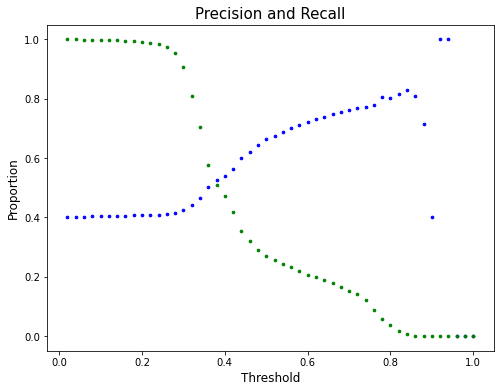

In [28]:
# Precison-Recall-Threshold Curve

# variavel de proporção para os gráficos
k = 2

# Define o tamanho da figura
fig = plt.figure(figsize = (k*4,k*3))

# Definindo a janela de plot
ax1 = fig.add_subplot(111)

# Scatter do Precision
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)

# Scatter do Recall
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)

# Configurações dos exiso
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)

# Cria titulo
plt.title("Precision and Recall", fontsize = 15)

# Mostra o gráfico
plt.show()

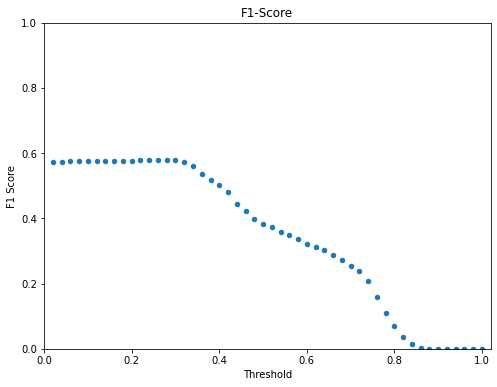

In [29]:
# Curva F1-Score

# Cria o plot
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
# Configurações do gráfico
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

# mostra o gráfico
plt.show()

In [30]:
# Cria a resposta com o novo threshold
y_pred_th = np.where(y_proba_test[:,1] >= 0.3, 1, 0)
y_pred_th

array([1, 1, 1, ..., 1, 1, 1])

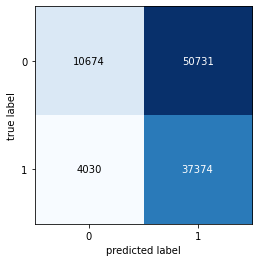

In [31]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred_th)

# plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

In [32]:
# Mostra o classification_report
print(classification_report(y_test, y_pred_th))

              precision    recall  f1-score   support

           0       0.73      0.17      0.28     61405
           1       0.42      0.90      0.58     41404

    accuracy                           0.47    102809
   macro avg       0.58      0.54      0.43    102809
weighted avg       0.60      0.47      0.40    102809



# Conclusão

De acordo com o nosso objetivo que era classificar o maior nº de pacientes com covid, foi necessário abaixar a probabilidade para que ele buscasse classificar o maior nº de pacientes contaminados possíveis, perdemos bastante em acurácia e precisão, mas dessa forma ganhariamos em vidas. Dado que nenhum modelo é 100% e dado a circunstância acredito que a melhor opção seria entregar uma acurácia mais baixa.